In [1]:
import sys
for path in ['../','../../','../../../']:
    sys.path.append(path+"CNT_Code/V0.03.28")
    
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from GraphTools import *
from GeneralTools import *

In [2]:
# import networkx as nx 

## condidate graphs

### edges

In [3]:
all_edges = []
for i in list('CARST'):
    out = 'CARTSY'.replace(i,'').replace('C','')
#     for o in list('CARTSY'):
    for o in list(out):
        all_edges.append((i,o))

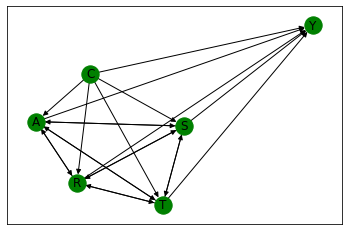

In [4]:
G = nx.DiGraph() # Graph()
G.add_edges_from(all_edges) 
nx.draw_networkx(G, with_label = True,node_color ='green') 

### valid graph

In [35]:
for ars in PowerSetsBinary('ARS'):
    inputs = ['C'] + ars
    count = 0
    graph_array = []
    for edges in PowerSetsBinary(all_edges):

        G = nx.DiGraph() # Graph()
        G.add_edges_from(edges) 

        if not valid_graph(G,inputs):
            continue

        count += 1
        G0 = G
        graph_array.append(G)
    data_save(graph_array,'graph_array_%s_%d.dat'%(''.join(inputs),count))
    print(inputs,count)

['C'] 1600
['C', 'A'] 640
['C', 'R'] 640
['C', 'A', 'R'] 104
['C', 'S'] 441
['C', 'A', 'S'] 63
['C', 'R', 'S'] 63
['C', 'A', 'R', 'S'] 3


In [28]:
graph_count = {'C': 1600,
                'CA': 640,
                'CR': 640,
                'CS': 441,
                'CAR': 104,
                'CAS': 63,
                'CRS': 63,
                'CARS': 3,
              }

In [40]:
for ars in PowerSetsBinary('ARS'):
    inputs = ['C'] + ars
    s = ''.join(inputs)
    count = graph_count[s]
    graph_array = data_load('graph_array_%s_%d.dat'%(s,count))
    
    c = 0
    graph_array2 = []
    for G in graph_array:
        if nx.algorithms.dag.dag_longest_path_length(G) > 2: #3,2
            continue
        c += 1
        graph_array2.append(G)

    data_save(graph_array2,'graph_array_%s_%d.dat'%(s,c))
    print(s+':',count,',',c,',')

C: 1600 , 24 ,
CA: 640 , 96 ,
CR: 640 , 96 ,
CAR: 104 , 78 ,
CS: 441 , 51 ,
CAS: 63 , 29 ,
CRS: 63 , 29 ,
CARS: 3 , 3 ,


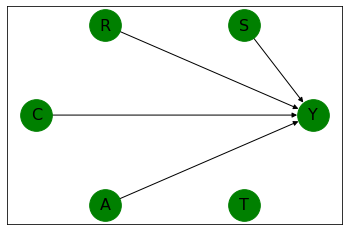

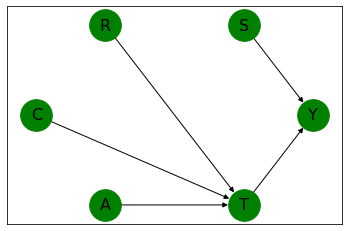

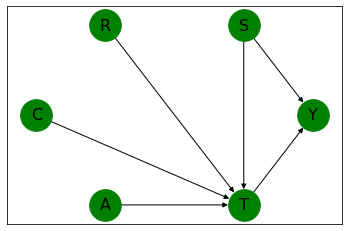

In [46]:
for G in graph_array2:
    nx_plot_cnt(G)
    plt.show()

### simple

In [53]:
simple_edges = []
for i in list('CARST'):
    simple_edges.append((i,'Y'))

count = 0
graph_array = []
for edges in PowerSetsBinary(simple_edges):
    if len(edges)==0:
        continue

    G = nx.DiGraph() # Graph()
    G.add_edges_from(edges) 

    count += 1
    G0 = G
    graph_array.append(G)
data_save(graph_array,'graph_array_simple_%d.dat'%(count))
print(count)

31


In [59]:
xSet_str = 'CAS'
graph_array = []
for xs in PowerSetsBinary('CARS'):
    if len(xs)==0: continue;
#     print(xs)
    G = str2nx(''.join(xs)+'->'+'Y')
    graph_array.append(G)
#     nx_plot_cnt(G);
#     plt.show()
    
for xs in PowerSetsBinary('CARS'):
    if len(xs)==0: continue;
#     print(xs)
    G = str2nx(''.join(xs)+'->T'+',ST->Y')
    graph_array.append(G)
#     nx_plot_cnt(G);
#     plt.show()

count = len(graph_array)
data_save(graph_array,'graph_array_simple2_%d.dat'%(count))
print(count)

30
